# <b>Rental Property Capstone Project - Clustering<br>

In [3]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
#Load Data
#Subset latest data with Net Cash Flows calculated
rental_data_latest = pd.read_csv('C:/datascience/springboard/projects/Rental Property ROI/data/Rental Data Latest.csv', parse_dates=['date'], infer_datetime_format=True) 

#Filter out luxury-properties equal to or above $500k
rental_data_latest = rental_data_latest[rental_data_latest['Neighborhood_Zhvi_SingleFamilyResidence'] <= 500000]

In [5]:
#Subset Features - 2 features used (Net Cash Flow and Home Value for Single Family Homes)
rental_data_features = rental_data_latest[['RegionID','RegionName','City','State','net_cf',
                                           'Neighborhood_Zhvi_SingleFamilyResidence']].set_index(['RegionID','RegionName','City','State'])

#Scale Data
scaled_data = StandardScaler().fit_transform(rental_data_features)

### <b>Cluster Optimization</b><br>
I tested three other models (Spectural Clustering, Agglomerative Clustering, and Affinity Propagation) and found that KMeans consistently produced higher silhouette scores, so I used KMeans exclusively throughout this excercise.

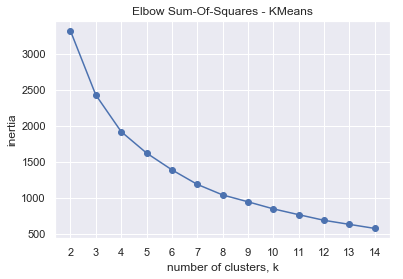

In [6]:
#Test/Optimize for number of clusters
#Evaluating model with range of ks (inertia is key measure)
k_range = range(2, 15)
inertias = []

for k in k_range:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(scaled_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(k_range, inertias, '-o')
plt.title('Elbow Sum-Of-Squares - KMeans')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k_range)
plt.show()

For n_clusters = 2 Average silhouette_score is : 0.414
For n_clusters = 3 Average silhouette_score is : 0.384
For n_clusters = 4 Average silhouette_score is : 0.356
For n_clusters = 5 Average silhouette_score is : 0.354
For n_clusters = 6 Average silhouette_score is : 0.348
For n_clusters = 7 Average silhouette_score is : 0.348
For n_clusters = 8 Average silhouette_score is : 0.349


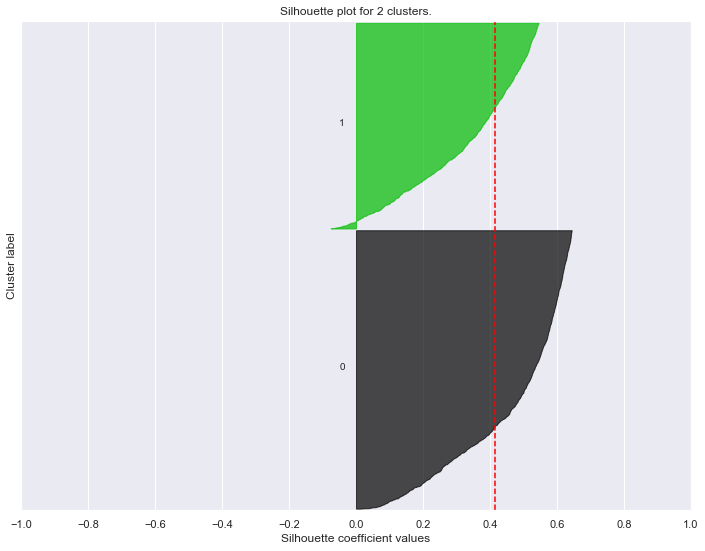

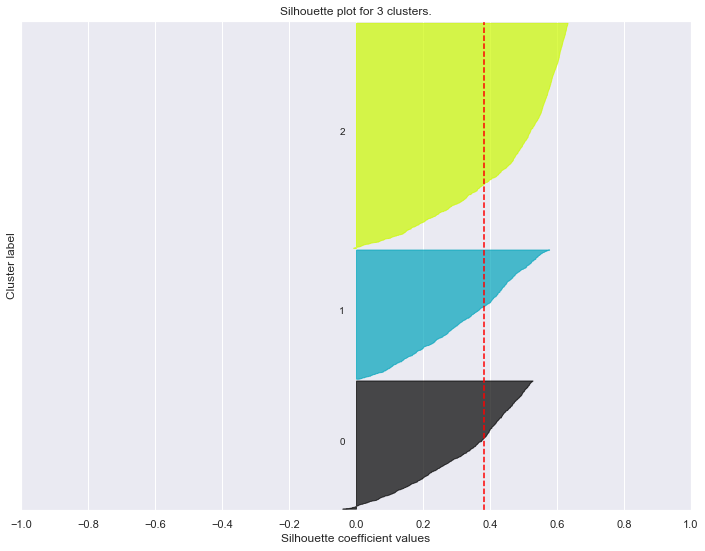

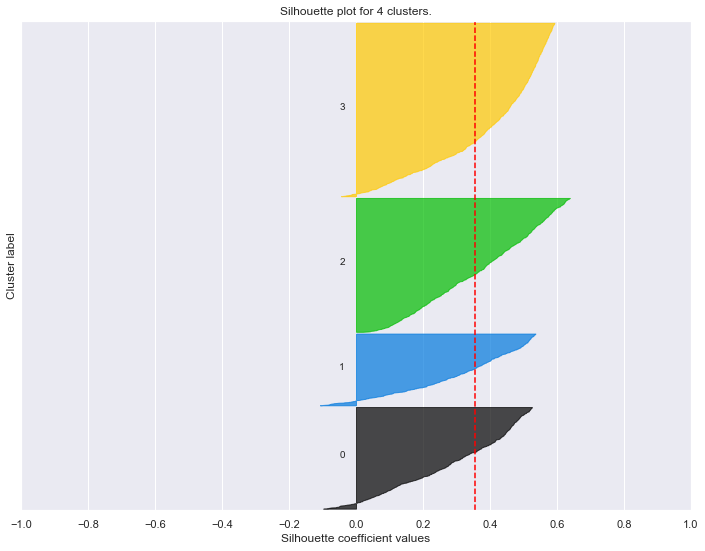

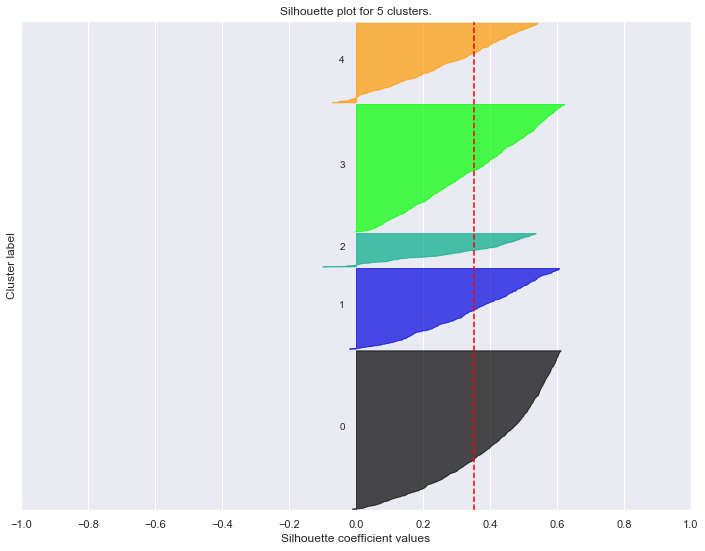

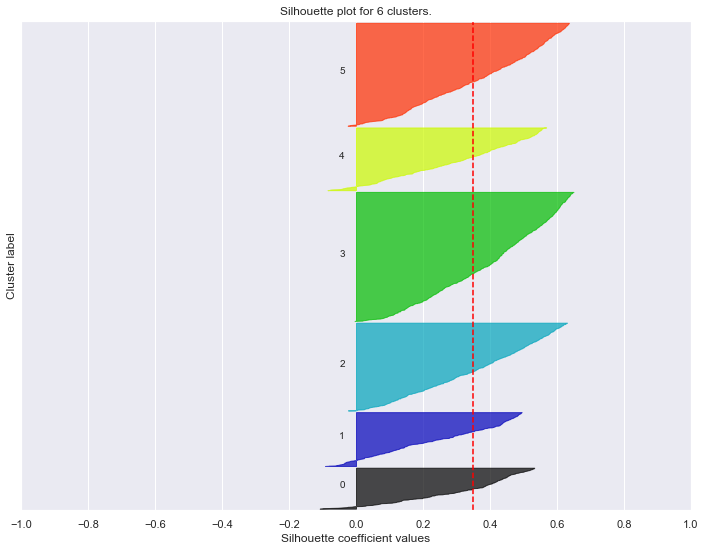

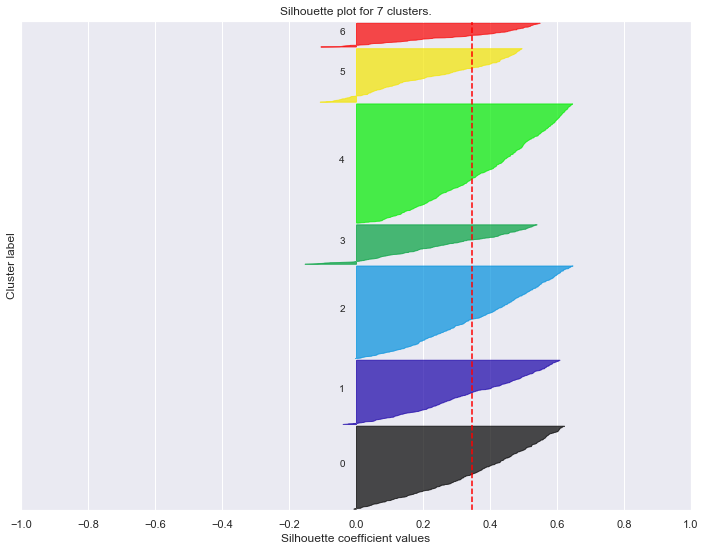

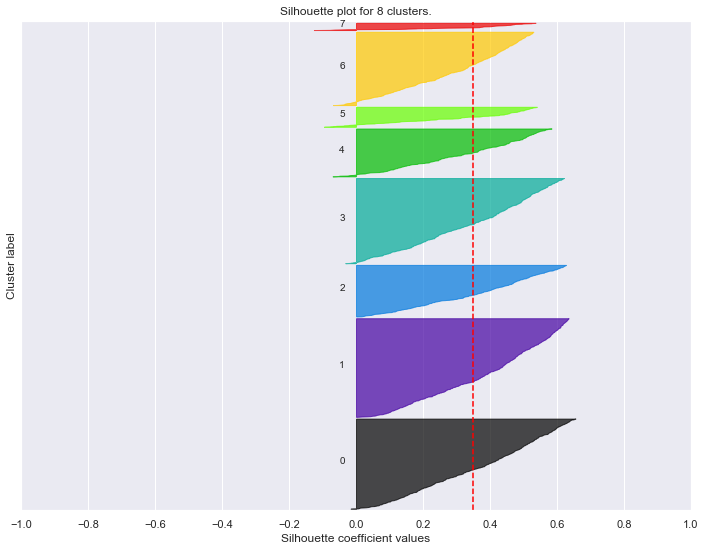

In [7]:
#Calculate and display silhouette scores for unfiltered dataset
k_range_new = range(2,9)

for k in k_range_new:
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(12, 9)
    
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 
        ax1.set_xlim([-1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(scaled_data) + (k + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        model = KMeans(n_clusters=k, random_state=10)
        labels = model.fit_predict(scaled_data)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(scaled_data, labels)
        print("For n_clusters =", k,
              "Average silhouette_score is :", round(silhouette_avg, 3))
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(scaled_data, labels)
    
        y_lower = 10
        for i in range(k):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / k)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("Silhouette plot for %s clusters." % str(int(i+1)))
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

### <b>Visualization</b><br>
Given the above scores provided a weak to modest structure and scores were not materially different across clusters, I visualized each cluster and found three clusters provided the most intuitive split given the two features.

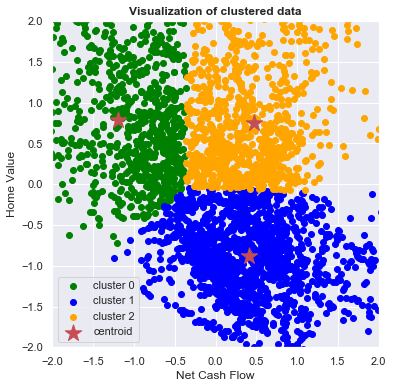

In [8]:
#Run implementation of kmeans
km = KMeans(n_clusters=3, max_iter=100)
km.fit(scaled_data)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(scaled_data[km.labels_ == 0, 0], scaled_data[km.labels_ == 0, 1],
            c='green', label='cluster 0')
plt.scatter(scaled_data[km.labels_ == 1, 0], scaled_data[km.labels_ == 1, 1],
            c='blue', label='cluster 1')
plt.scatter(scaled_data[km.labels_ == 2, 0], scaled_data[km.labels_ == 2, 1],
            c='orange', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Net Cash Flow')
plt.ylabel('Home Value')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

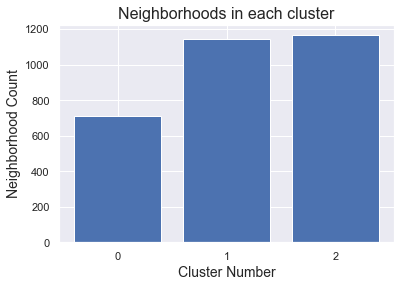

In [9]:
#Plot clustered data (k=3) to see count distribution across clusters
cluster = KMeans(n_clusters=3, random_state=5)
rental_data_features['cluster'] = cluster.fit_predict(rental_data_features)

#create df of value counts
barp_data = rental_data_features.cluster.value_counts().reset_index().rename(columns={'index':'clus_num'})

#Plot counts in each cluster
plt.bar(x=barp_data.clus_num, height=barp_data.cluster)
plt.title('Neighborhoods in each cluster', Size=16)
plt.xlabel('Cluster Number', size=14)
plt.ylabel('Neighborhood Count', size=14)
plt.xticks(barp_data.clus_num)
plt.show()

### <b>Application</b><br>
Now that I've optimized the KMeans model, I show how this excercise could be used in a real world application.

In [10]:
#Combine cluster data with latest rental dataset
cluster_num_df = rental_data_features.copy().reset_index()[['RegionID','cluster']]
rental_data_latest_new = pd.merge(rental_data_latest, cluster_num_df, on='RegionID')

#Create pivot table with State summary data by cluster for more intuitive breakdown
piv = rental_data_latest_new.groupby(['State','cluster'], as_index=False)['RegionID'].agg('count')

#Pivot data for more readable format
piv = pd.pivot_table(piv, values='RegionID', index='State', columns='cluster')
piv = piv.fillna(0)
#Calculate and sort pct_of_total for each state in cluster
piv.loc[:, 'pct_of_total'] = round(piv.sum(axis=1)/len(rental_data_latest_new),2)*100
piv.sort_values('pct_of_total', ascending=False)

cluster,0,1,2,pct_of_total
State,,,,
TX,61.0,222.0,123.0,13.0
FL,52.0,91.0,140.0,9.0
CA,124.0,10.0,101.0,8.0
AZ,39.0,51.0,112.0,7.0
OH,8.0,96.0,54.0,5.0
WA,58.0,12.0,48.0,4.0
PA,15.0,55.0,38.0,4.0
NC,25.0,62.0,39.0,4.0
IN,1.0,68.0,20.0,3.0


In [21]:
#Subset MN, a market I have domain knowledge in. The clustering excercise narrowed my neighborhood choices in MN from 64 to 17.
mn_neigh_all = rental_data_latest_new[rental_data_latest_new['State'] == 'MN']

#Sort by net_cash_flow and view all MN neighborhoods to see if cluster stands out
print(mn_neigh_all[['RegionName','State','net_cf','cluster']].sort_values('net_cf', ascending=False).round({'net_cf':0})[0:10])                                       

#All States in cluster 1. Compare against MN market.
#clust = rental_data_latest_new[rental_data_latest_new['cluster'] == 1]
print(rental_data_latest_new[['RegionName','State','net_cf', 'cluster']].sort_values('net_cf', ascending=False)[2:19].round({'net_cf':0})[0:10])

          RegionName State  net_cf  cluster
1450      East Isles    MN  1242.0        0
928         Whittier    MN   727.0        1
1948  Southeast Como    MN   589.0        2
902        Hawthorne    MN   456.0        1
1667        Mckinley    MN   439.0        1
929      Willard Hay    MN   417.0        1
910     Marcy Holmes    MN   411.0        2
1500         Folwell    MN   409.0        1
1452   East Phillips    MN   405.0        1
924    Webber-Camden    MN   392.0        1
                  RegionName State  net_cf  cluster
1450              East Isles    MN  1242.0        0
374           Heritage Hills    NY   955.0        0
87              Indian Creek    CO   935.0        2
252                Brookwood    GA   877.0        2
2265            Meadow Hills    CO   798.0        2
2369  Cadwalader & Hillcrest    NJ   782.0        1
2121            Chambersburg    NJ   777.0        1
479               Wynnefield    PA   767.0        1
2267             Sable Ridge    CO   759.0      

### Conclusion
Now that I've subsetted a specific neighborhood list in MN, we now have a comparable list of neighborhoods (by net cash flow and hoem value). I could then contact a real estate agent to help me locate properties in these neighborhoods. Given the complex nature of rental properties and real estate in general, "boots to the ground" research is needed to finalize the purchase. Many factors come into play that this model doesn't encompass, but it's useful as a complement (and could get better as you add new features or take different approaches); helping an investor to compare their options across the U.S. 